In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics
from scipy import stats
import mplcursors
from ipywidgets import interact, interactive, fixed, interact_manual
import plotly.graph_objects as go
import nbformat

In [143]:
# Directory containing the data files
directory = './GM12878'
file_path1 = os.path.join(directory, 'ml3_AAGCGACC-ACCTCTTG.txt')
file_path2 = os.path.join(directory, 'ml3_CCGAAGTG-ACCTCTTG.txt')

In [149]:
def load_contact_matrix(data, matrix_size=200):
    # Filter interactions within the same chromosome
    data = data[data['chr1'] == data['chr2']]
    
    # Determine the range of positions
    max_pos = data[['pos1', 'pos2']].max().max()
    min_pos = data[['pos1', 'pos2']].min().min()
    
    # Define the bin size dynamically based on the desired matrix size
    bin_size = (max_pos - min_pos) / matrix_size
    
    # Create bins
    bins = np.linspace(min_pos, max_pos, matrix_size + 1)
    
    # Create a mapping of positions to bins
    data['bin1'] = np.digitize(data['pos1'], bins) - 1
    data['bin2'] = np.digitize(data['pos2'], bins) - 1
    
    # Ensure bins do not exceed the matrix size
    data['bin1'] = data['bin1'].clip(upper=matrix_size - 1)
    data['bin2'] = data['bin2'].clip(upper=matrix_size - 1)
    
    # Create unique identifiers for each bin
    data['bin_id1'] = data['chr1'].astype(str) + '_' + data['bin1'].astype(str)
    data['bin_id2'] = data['chr2'].astype(str) + '_' + data['bin2'].astype(str)
    
    # Get unique bins
    unique_bins = np.unique(np.concatenate([data['bin_id1'], data['bin_id2']]))

    
    # Initialize the contact matrix
    contact_matrix = np.zeros((matrix_size, matrix_size))
    
    # Populate the contact matrix
    for _, row in data.iterrows():
        idx1 = row['bin1']
        idx2 = row['bin2']
        contact_matrix[idx1, idx2] += row['interaction']
        contact_matrix[idx2, idx1] += row['interaction']  # Assuming symmetry
    
    return contact_matrix

(200, 200)


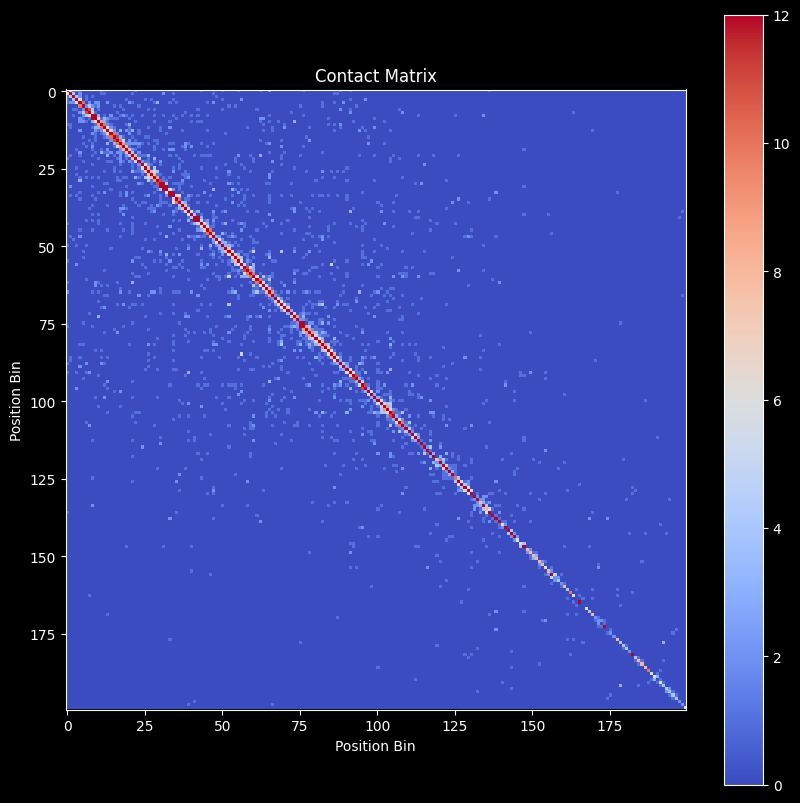

In [150]:
data1 = pd.read_csv(file_path1, sep='\t', header=None, names=['chr1', 'pos1', 'chr2', 'pos2', 'interaction'])
contact1 = load_contact_matrix(data1, 200)
print(contact1.shape)
# Plot the matrix with adjusted color scale
plt.figure(figsize=(10, 10))
plt.imshow(contact1, cmap='coolwarm', interpolation='none', vmin=0, vmax=12)
plt.colorbar()
plt.title('Contact Matrix')
plt.xlabel('Position Bin')
plt.ylabel('Position Bin')
plt.show()

(200, 200)
[243000000 244000000]
[244000000]
<class 'pandas.core.frame.DataFrame'>
(200, 200)


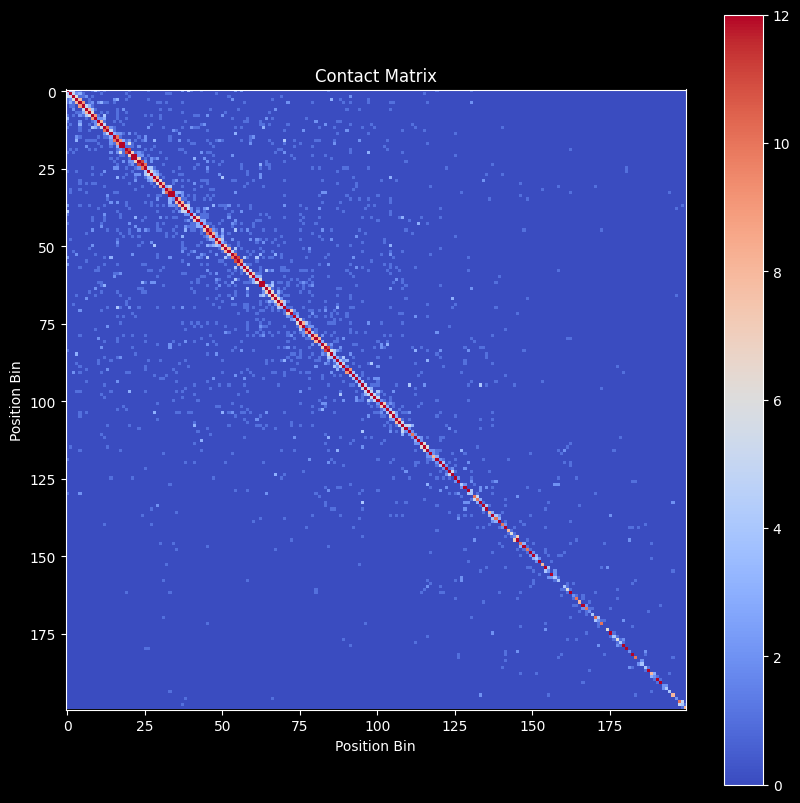

In [152]:
# matrix1 = load_contact_matrix(file_path1)
# matrix2 = load_contact_matrix(file_path2)


data = pd.read_csv(file_path1, sep='\t', header=None)

# Assign column names
data.columns = ['chr1', 'pos1', 'chr2', 'pos2', 'interaction']

# Find unique values in column 2 (pos1) and column 4 (pos2)
unique_posx = data['pos1'].unique()
unique_posy = data['pos2'].unique()


data2 = pd.read_csv(file_path2, sep='\t', header=None)
data2.columns = ['chr1', 'pos1', 'chr2', 'pos2', 'interaction']
data2_x = data2['pos1'].unique()
data2_y = data2['pos2'].unique()

matrix = load_contact_matrix(data2)
print(matrix.shape)

diff_x = np.setdiff1d(unique_posx, data2_x)  # columns missing
diff_y = np.setdiff1d(unique_posy, data2_y)  # rows missing

print(diff_x)
print(diff_y)

missing_data = data[data['pos1'].isin(diff_x) | data['pos2'].isin(diff_y)]

data2_new = pd.concat([data2, missing_data], ignore_index=True)

print(type(data2_new))

matrix = load_contact_matrix(data2_new)
print(matrix.shape)

# Plot the matrix
plt.figure(figsize=(10, 10))
plt.imshow(matrix, cmap='coolwarm', interpolation='none', vmin=0, vmax=12)
plt.colorbar()
plt.title('Contact Matrix')
plt.xlabel('Position Bin')
plt.ylabel('Position Bin')
plt.show()

In [153]:
# Find all (200, 200) full matrices
full_matrices = []
full_dir = []
for file in os.listdir(directory):
    filepath = os.path.join(directory, file)
    
    if os.path.isfile(filepath):
        data = pd.read_csv(filepath, sep='\t', header=None)
        data.columns = ['chr1', 'pos1', 'chr2', 'pos2', 'interaction']
        matrix = load_contact_matrix(data)
        if matrix.shape == (200, 200):
            full_matrices.append(matrix)
            full_dir.append(filepath)

# Convert matrices to NumPy arrays and sum them element-wise
avg_matrix = np.sum(full_matrices, axis=0) / len(full_matrices)
average_matrix_df = pd.DataFrame(avg_matrix)

In [154]:
t = pd.read_csv("./GM12878/ml3_AGGTGCGA-TATCTTGT.txt", sep='\t', header=None)
# Assign column names
t.columns = ['chr1', 'pos1', 'chr2', 'pos2', 'interaction']
t_x = t['pos1'].unique()
t_y = t['pos2'].unique()
print(len(t_x), len(t_y))
tmatrix = load_contact_matrix(t)
print("matrixshape:", tmatrix.shape)

print(len(unique_posx), len(unique_posy))
diff_x = np.setdiff1d(t_x, unique_posx)  # columns missing
diff_y = np.setdiff1d(t_y, unique_posy)  # rows missing
print(diff_x, diff_y)


247 250
matrixshape: (200, 200)
246 247
[235000000] [247000000 248000000 249000000]


In [155]:

full1 = pd.read_csv("./GM12878/ml3_AAGCGACC-ACCTCTTG.txt", sep='\t', header=None)
full2 = pd.read_csv("./GM12878/ml3_AAGCGACC-ACCTCTTG.txt", sep='\t', header=None)

# Assign column names
full1.columns = ['chr1', 'pos1', 'chr2', 'pos2', 'interaction']

# Find unique values in column 2 (pos1) and column 4 (pos2)
full1_posx = full1['pos1'].unique()
full1_posy = full1['pos2'].unique()
print(len(full1_posx), len(full1_posy))

# Assign column names
full2.columns = ['chr1', 'pos1', 'chr2', 'pos2', 'interaction']

# Find unique values in column 2 (pos1) and column 4 (pos2)
full2_posx = full2['pos1'].unique()
full2_posy = full2['pos2'].unique()
print(len(full2_posx), len(full2_posy))

diff_x = np.setdiff1d(full1_posx, full2_posx)  # columns missing
diff_y = np.setdiff1d(full1_posy, full2_posy)  # rows missing

print(diff_x)
print(diff_y)


for file in full_dir:
    full = pd.read_csv(file, sep='\t', header=None)
    full.columns = ['chr1', 'pos1', 'chr2', 'pos2', 'interaction']
    # Find unique values in column 2 (pos1) and column 4 (pos2)
    full_posx = full['pos1'].unique()
    full_posy = full['pos2'].unique()
    print(len(full_posx), len(full_posy))


246 247
246 247
[]
[]
240 239
248 248
246 250
246 247
241 247
244 246
241 242
247 248
237 248
248 249
244 243
237 245
247 250
249 248
250 250
249 249
246 247
249 248
247 249
246 250
245 248
249 248
244 247
240 243


In [162]:

def find_max_shape_matrix(genotype: str) -> str:
    addr = ""
    max = (0, 0)
    for file in os.listdir(genotype):
        filepath = os.path.join(genotype, file)
        full = pd.read_csv(filepath, sep='\t', header=None)
        full.columns = ['chr1', 'pos1', 'chr2', 'pos2', 'interaction']
        # Find unique values in column 2 (pos1) and column 4 (pos2)
        full_posx = full['pos1'].unique()
        full_posy = full['pos2'].unique()
        if len(full_posx) > max[0] and len(full_posy) > max[1]:
            max = (len(full_posx), len(full_posy))
            addr = filepath

    return addr

    

./HAP1/pl2_AACGGTCG-GAACTATA.txt
